In [1]:
import pandas as pd 
import numpy as np 


In [2]:


import pandas as pd
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\Email Spam\\spam.csv", encoding='latin1')
dt = pd.DataFrame(df)
dt


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
dt.shape

(5572, 5)

In [4]:
# DataCleaning
 # EDA
 # Text Preprocessing
 # Model Building 
 # Evaluation
 # Impprovement
  # Website 
  # DEploy

# Data Cleaning 

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
dt.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


In [7]:
dt.sample(2)

,v1,v2
2059,ham,He didn't see his shadow. We get an early spri...
5019,ham,"It's cool, we can last a little while. Getting..."


In [8]:
# renaming the column 

In [9]:
dt.rename(columns={'v1':'target','v2':'text'},inplace=True)
dt.sample(10)

,target,text
971,ham,"Haha awesome, omw back now then"
2687,ham,Okie
2167,ham,Yes.he have good crickiting mind
3520,ham,Hey... are you going to quit soon? Xuhui and i...
3967,ham,Did u turn on the heater? The heater was on an...
4294,spam,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...
4825,ham,"Haha, just what I was thinkin"
3262,ham,So u gonna get deus ex?
3891,spam,URGENT This is our 2nd attempt to contact U. Y...
148,ham,K..i deleted my contact that why?


In [10]:
from sklearn .preprocessing import LabelEncoder
encoder=LabelEncoder()


In [11]:
dt['target']=encoder.fit_transform(dt['target'])
dt

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
#missing values 

In [13]:
dt.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
## Duplicated values 
dt.duplicated().sum()

np.int64(403)

In [15]:
#remove duplicates
dt=dt.drop_duplicates(keep='first')

In [16]:
#check again duplicates
dt.duplicated().sum()

np.int64(0)

In [17]:
dt.shape

(5169, 2)

# Exploratory Data Analysis.()

In [18]:
dt['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

## data Visualization

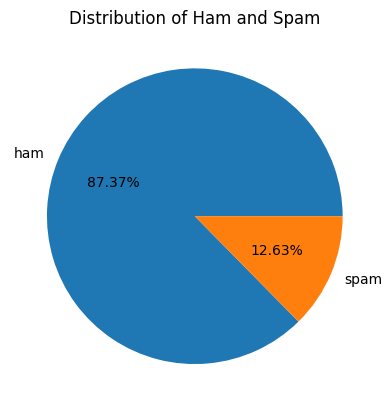

In [19]:
import matplotlib.pyplot as plt

# Pie chart of ham vs spam
plt.pie(dt['target'].value_counts(), 
        labels=['ham', 'spam'], 
        autopct="%0.2f%%")

plt.title("Distribution of Ham and Spam")
plt.show()


#### data is imbalance

In [20]:
import nltk



In [21]:
# number of charactetrs 
dt.loc[:, 'num_characters'] = dt['text'].apply(len)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23092\1084190510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.loc[:, 'num_characters'] = dt['text'].apply(len)


In [22]:
dt

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [23]:
import nltk



In [24]:

dt['num_words'] = dt['text'].apply(lambda x: len(x.split()))


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23092\3980318715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['num_words'] = dt['text'].apply(lambda x: len(x.split()))


In [25]:
dt

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30
5568,0,Will Ì_ b going to esplanade fr home?,37,8
5569,0,"Pity, * was in mood for that. So...any other s...",57,10
5570,0,The guy did some bitching but I acted like i'd...,125,26


In [26]:
dt['num_sentences'] = dt['text'].apply(lambda x: sum(x.count(p) for p in ['.', '!', '?']))
dt.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23092\2175623449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['num_sentences'] = dt['text'].apply(lambda x: sum(x.count(p) for p in ['.', '!', '?']))


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,8
1,0,Ok lar... Joking wif u oni...,29,6,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,6
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


## describe last three created columns 

In [27]:
dt[['num_characters','num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.461018
std,58.236293,11.068488,2.686481
min,2.000000,1.000000,0.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,42.000000


In [28]:
dt[dt['target']==0][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,2.384190
std,56.358207,11.116240,2.773408
min,2.000000,1.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,18.000000,3.000000
max,910.000000,171.000000,42.000000


In [29]:
dt[dt['target']==1][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.992343
std,30.137753,5.967672,1.902114
min,13.000000,2.000000,0.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,13.000000


<Axes: xlabel='num_characters', ylabel='Count'>

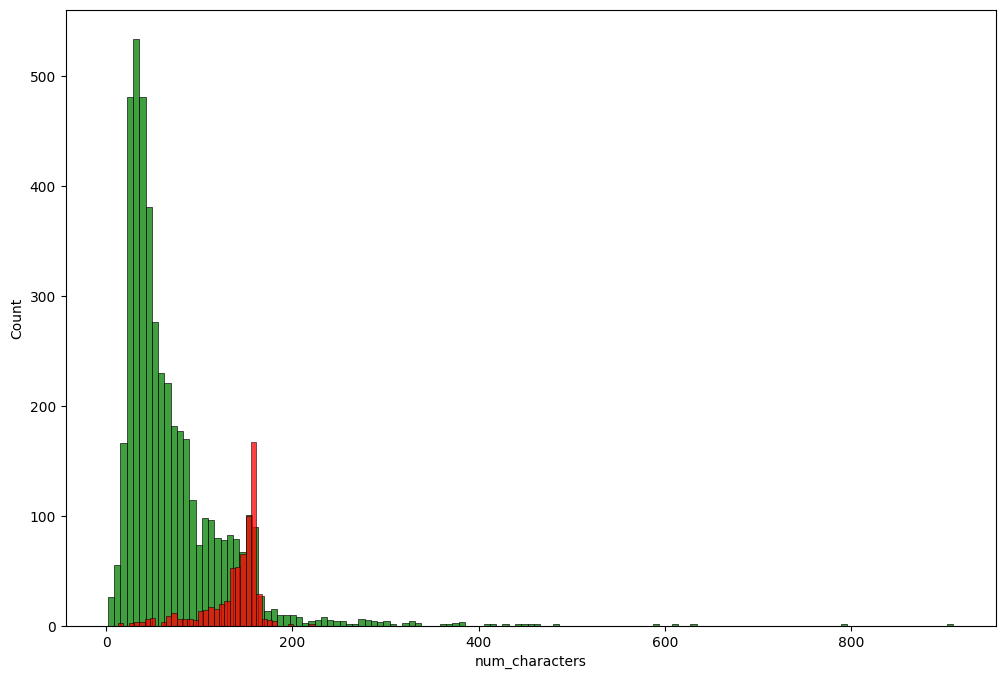

In [30]:
import seaborn as sns
dt[dt['target']==0]['num_characters']
plt.figure(figsize=(12,8))
sns.histplot(dt[dt['target']==0]['num_characters'],color='green')
sns.histplot(dt[dt['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

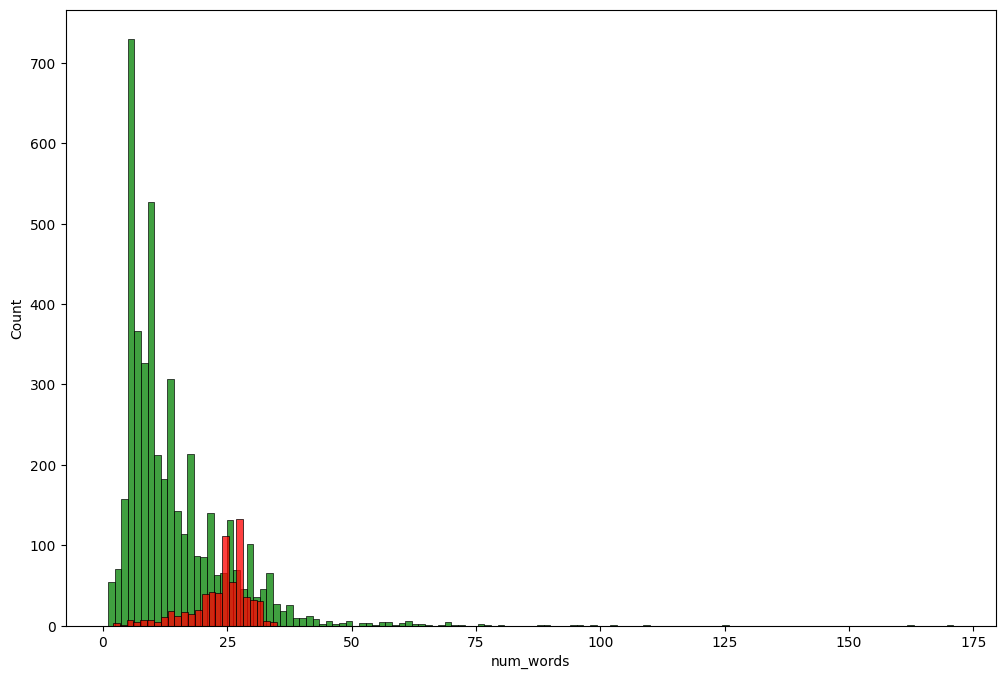

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(dt[dt['target']==0]['num_words'],color='green')
sns.histplot(dt[dt['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

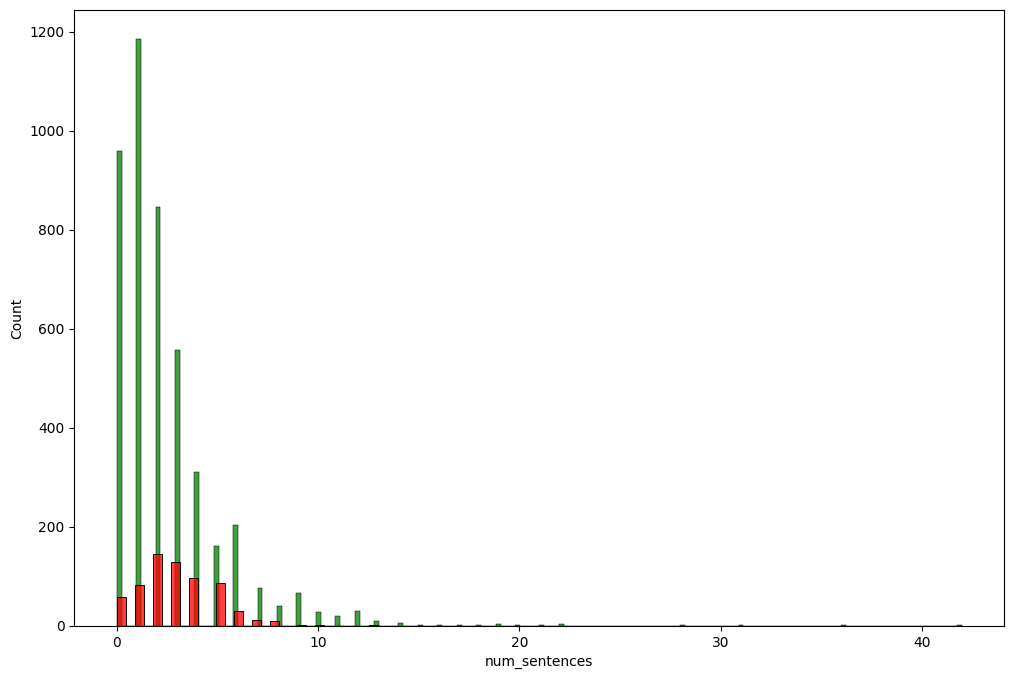

In [32]:
plt.figure(figsize=(12,8))
sns.histplot(dt[dt['target']==0]['num_sentences'],color='green')
sns.histplot(dt[dt['target']==1]['num_sentences'],color='red')

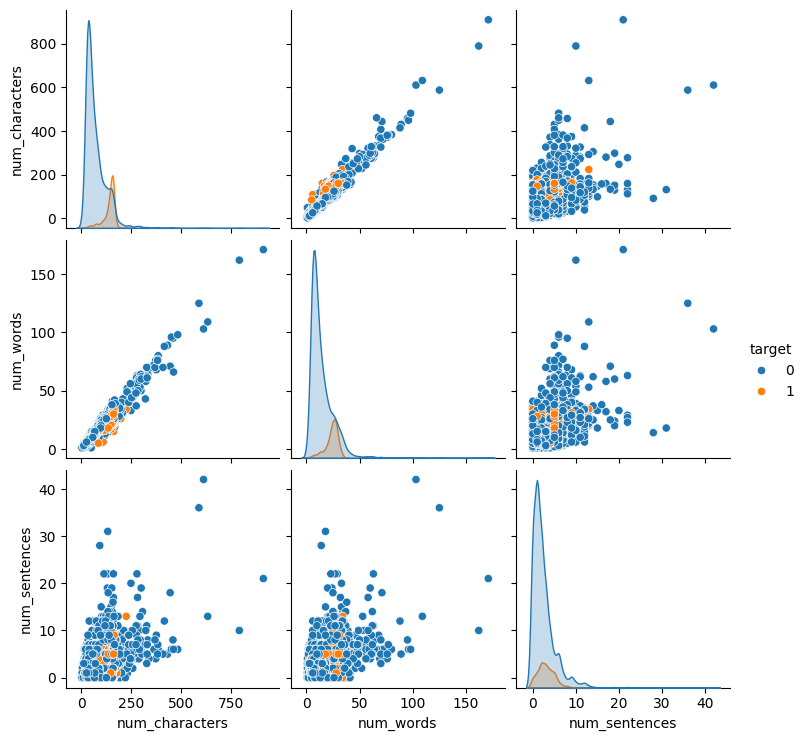

In [33]:
sns.pairplot(dt,hue='target')

In [34]:
dt.select_dtypes(include='number').corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.286576,0.075214
num_characters,0.384717,1.000000,0.973667,0.491426
num_words,0.286576,0.973667,1.000000,0.473288
num_sentences,0.075214,0.491426,0.473288,1.000000


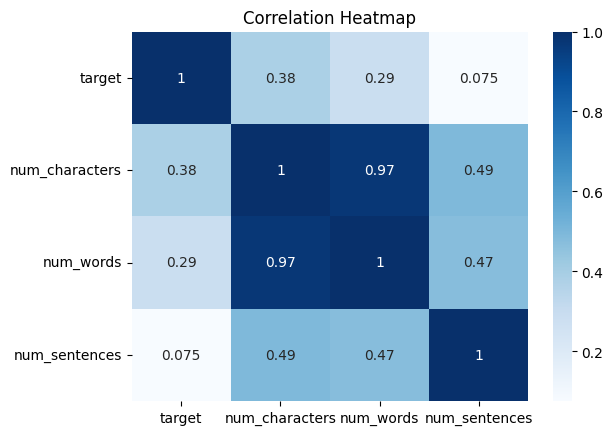

In [35]:
sns.heatmap(dt.select_dtypes(include='number').corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

# data Preprocessing
### Lowercase
### Tokenization
### Removing spacial characters 
### Removing stopwords and punctuataion
### Stemming

### 

In [36]:
import nltk

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def transform_text(text):
    # Step 1: Lowercase
    text = text.lower()

    # Step 2: Remove URLs, mentions, hashtags, numbers, special chars (optional)
    
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)      # URLs
    text = re.sub(r'@\w+|#\w+', '', text)                    # Mentions/hashtags
    text = re.sub(r'[^a-z\s]', '', text)                     # Non-alphabets

    # Step 3: Tokenization
    words = word_tokenize(text)

    # Step 4: Remove stopwords & short words
    filtered_words = [word for word in words if word not in stop_words and len(word) > 2]

    # Step 5: Stemming
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    return " ".join(stemmed_words)


In [38]:

 transform_text("learning .")


'learn'

In [39]:
dt['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [40]:
dt['transformed_text'] = dt['text'].apply(transform_text)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23092\2009736847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['transformed_text'] = dt['text'].apply(transform_text)


In [41]:
dt

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,8,jurong point crazi avail bugi great world buff...
1,0,Ok lar... Joking wif u oni...,29,6,6,lar joke wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entri wkli comp win cup final tkt may tex...
3,0,U dun say so early hor... U c already then say...,49,11,6,dun say earli hor alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah dont think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30,5,time tri contact pound prize claim easi call p...
5568,0,Will Ì_ b going to esplanade fr home?,37,8,1,go esplanad home
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,5,piti mood soani suggest
5570,0,The guy did some bitching but I acted like i'd...,125,26,0,guy bitch act like interest buy someth els nex...


In [42]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
spam_wc=wc.generate(dt[dt['target']==1]['transformed_text'].str.cat(sep=" "))

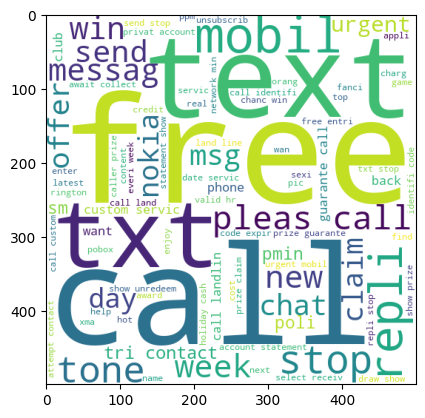

In [44]:
plt.imshow(spam_wc)

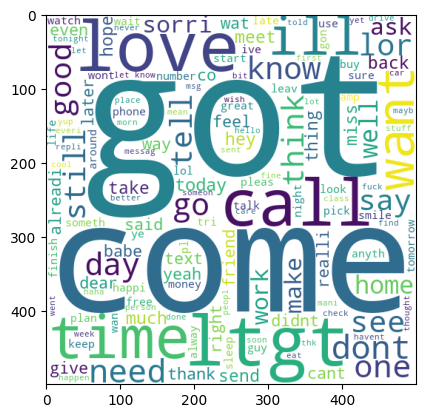

In [45]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
ham_wc=wc.generate(dt[dt['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [46]:
spam_corpus=[]
for msg in dt[dt['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [47]:
spam_corpus

['free',
 'entri',
 'wkli',
 'comp',
 'win',
 'cup',
 'final',
 'tkt',
 'may',
 'text',
 'receiv',
 'entri',
 'questionstd',
 'txt',
 'ratetc',
 'appli',
 'over',
 'freemsg',
 'hey',
 'darl',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'valid',
 'hour',
 'mobil',
 'month',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'free',
 'six',
 'chanc',
 'win',
 'cash',
 'pound',
 'txt',
 'csh',
 'send',
 'cost',
 'pday',
 'day',
 'tsandc',
 'appli',
 'repli',
 'info',
 'urgent',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 'lccltd',
 'pobox',
 'ldnwarw',
 'xxxmobilemovieclub',
 'use',
 'credit',
 'click',
 'wap',
 'link',
 'next',
 'txt',
 'messag',
 'click',
 'xxxmobilemovieclubcomnqjkgighjjgcbl',
 'england',
 'macedonia',
 '

In [48]:
len(spam_corpus)

8284

In [49]:
from collections import Counter  

Counter(spam_corpus)

Counter({'call': 324,
         'free': 190,
         'txt': 138,
         'text': 122,
         'mobil': 115,
         'stop': 106,
         'repli': 101,
         'claim': 98,
         'prize': 82,
         'get': 73,
         'new': 64,
         'servic': 64,
         'tone': 62,
         'nokia': 60,
         'send': 59,
         'urgent': 58,
         'award': 56,
         'contact': 56,
         'phone': 53,
         'cash': 51,
         'pleas': 51,
         'week': 50,
         'win': 49,
         'min': 47,
         'collect': 44,
         'custom': 42,
         'guarante': 42,
         'messag': 41,
         'per': 41,
         'ppm': 38,
         'chat': 38,
         'box': 37,
         'msg': 36,
         'tri': 36,
         'number': 35,
         'draw': 34,
         'show': 33,
         'line': 33,
         'offer': 32,
         'receiv': 31,
         'today': 31,
         'latest': 30,
         'day': 30,
         'landlin': 30,
         'want': 30,
         'video': 29,


In [50]:

Counter(spam_corpus).most_common(30)

[('call', 324),
 ('free', 190),
 ('txt', 138),
 ('text', 122),
 ('mobil', 115),
 ('stop', 106),
 ('repli', 101),
 ('claim', 98),
 ('prize', 82),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('tone', 62),
 ('nokia', 60),
 ('send', 59),
 ('urgent', 58),
 ('award', 56),
 ('contact', 56),
 ('phone', 53),
 ('cash', 51),
 ('pleas', 51),
 ('week', 50),
 ('win', 49),
 ('min', 47),
 ('collect', 44),
 ('custom', 42),
 ('guarante', 42),
 ('messag', 41),
 ('per', 41),
 ('ppm', 38)]

In [51]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,324
1,free,190
2,txt,138
3,text,122
4,mobil,115
5,stop,106
6,repli,101
7,claim,98
8,prize,82
9,get,73


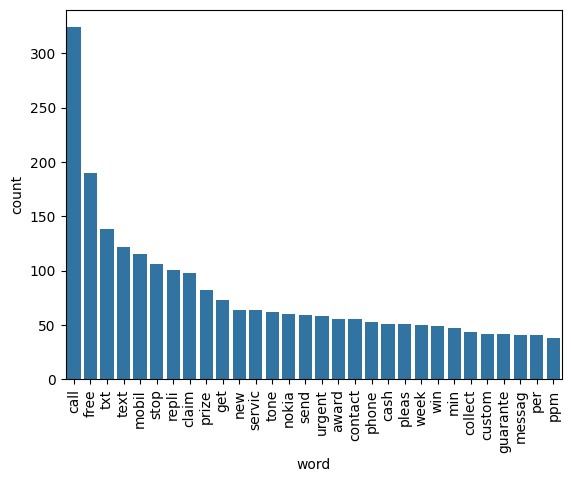

In [52]:
df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=df)
plt.xticks(rotation='vertical')

plt.show()

In [53]:
ham_corpus=[]
for msg in dt[dt['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [54]:
len(ham_corpus)

32067

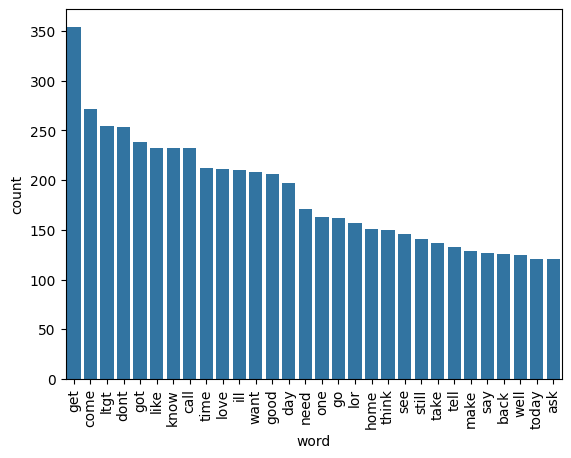

In [55]:
df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=df)
plt.xticks(rotation='vertical')

plt.show()

# MODEL BUILDING

In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [57]:
X = tfidf.fit_transform(dt['transformed_text']).toarray()
X.shape
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 3000))

In [58]:
Y = dt['target'].values
Y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X)
print(Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0 1 ... 0 0 0]


In [60]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

# Example classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [61]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))


0.8568665377176016
[[777 119]
 [ 29 109]]
0.4780701754385965


In [62]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9690522243713733
[[895   1]
 [ 31 107]]
0.9907407407407407


In [63]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9796905222437138
[[894   2]
 [ 19 119]]
0.9834710743801653


In [64]:
# tfidf --> MNB

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [66]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [67]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [68]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [69]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9680851063829787, 0.9487179487179487)

In [70]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Ignore the CPU warning


accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test)
    
    # Neatly formatted output
    print(f"\n📊 Results for: {name}")
    print(f"✅ Accuracy  : {current_accuracy:.4f}")
    print(f"🎯 Precision : {current_precision:.4f}")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



📊 Results for: SVC
✅ Accuracy  : 0.9681
🎯 Precision : 0.9487


  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                   


📊 Results for: KN
✅ Accuracy  : 0.9091
🎯 Precision : 1.0000

📊 Results for: NB
✅ Accuracy  : 0.9691
🎯 Precision : 0.9907

📊 Results for: DT
✅ Accuracy  : 0.9362
🎯 Precision : 0.8214

📊 Results for: LR
✅ Accuracy  : 0.9565
🎯 Precision : 0.9604

📊 Results for: RF
✅ Accuracy  : 0.9720
🎯 Precision : 0.9739

📊 Results for: AdaBoost
✅ Accuracy  : 0.9255
🎯 Precision : 0.8506

📊 Results for: BgC
✅ Accuracy  : 0.9613
🎯 Precision : 0.8769

📊 Results for: ETC
✅ Accuracy  : 0.9700
🎯 Precision : 0.9573

📊 Results for: GBDT
✅ Accuracy  : 0.9487
🎯 Precision : 0.9474

📊 Results for: xgb
✅ Accuracy  : 0.9700
🎯 Precision : 0.9496


In [71]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [72]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.909091,1.000000
2,NB,0.969052,0.990741
5,RF,0.971954,0.973913
4,LR,0.956480,0.960396
8,ETC,0.970019,0.957265
10,xgb,0.970019,0.949580
0,SVC,0.968085,0.948718
9,GBDT,0.948743,0.947368
7,BgC,0.961315,0.876923
6,AdaBoost,0.925532,0.850575


In [73]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [74]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.909091
1,NB,Accuracy,0.969052
2,RF,Accuracy,0.971954
3,LR,Accuracy,0.956480
4,ETC,Accuracy,0.970019
5,xgb,Accuracy,0.970019
6,SVC,Accuracy,0.968085
7,GBDT,Accuracy,0.948743
8,BgC,Accuracy,0.961315
9,AdaBoost,Accuracy,0.925532


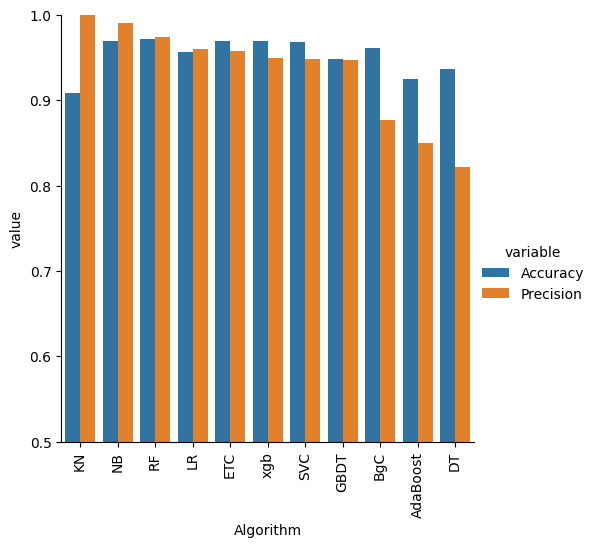

In [75]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# model improve
### 1. Change the max_features parameter of TfIdf

In [76]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [77]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [78]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [79]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [80]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [81]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.909091,1.000000,0.909091,1.000000,0.909091,1.000000,0.909091,1.000000
1,NB,0.969052,0.990741,0.969052,0.990741,0.969052,0.990741,0.969052,0.990741
2,RF,0.971954,0.973913,0.971954,0.973913,0.971954,0.973913,0.971954,0.973913
3,LR,0.956480,0.960396,0.956480,0.960396,0.956480,0.960396,0.956480,0.960396
4,ETC,0.970019,0.957265,0.970019,0.957265,0.970019,0.957265,0.970019,0.957265
5,xgb,0.970019,0.949580,0.970019,0.949580,0.970019,0.949580,0.970019,0.949580
6,SVC,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718
7,GBDT,0.948743,0.947368,0.948743,0.947368,0.948743,0.947368,0.948743,0.947368
8,BgC,0.961315,0.876923,0.961315,0.876923,0.961315,0.876923,0.961315,0.876923
9,AdaBoost,0.925532,0.850575,0.925532,0.850575,0.925532,0.850575,0.925532,0.850575


### Voting Classifier

In [82]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [83]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [84]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [85]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9748549323017408
Precision 0.9827586206896551


### Applying stacking

In [86]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [87]:
from sklearn.ensemble import StackingClassifier

In [88]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [89]:
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9748549323017408
Precision 0.9375


In [90]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))   # Save vectorizer
pickle.dump(mnb, open('model.pkl', 'wb'))          # Save trained MultinomialNB model
